In [1]:
import numpy as np
import pandas as pd

# Step 1: Business Problem




**This dataset provides a comprehensive overview of various factors
affecting student performance in exams. It includes information on study habits, attendance
parental involvement, and other aspects influencing academic succes**.
**Problem Statement: Using the provided dataset (StudentPerformanceFactors.csv), your task 
is to analyze the key factors that influence student performance and develop a predictive 
model to identify students who are at risk of underperforming. Your findings will help the 
school district take proactive measures to improve student succ**

**Objective: 
1. Identify the most important factors that affect student performance 
2. Provide a data-driven strategy to enhance academic outcomes. 
3. Develop visualizations and summary statistics to communicate findings effectively. 
4. Analyze the distribution of key variables and detect any correlations between **em. ess 


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Step 2.1: Load the Data

In [4]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\srk_sir_datasets\StudentPerformanceFactors.csv")

df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# Step 2.2  Data Understanding

In [4]:
df.shape

(6607, 20)

**Observation**:
- 6607 Rows
- 20 columns

In [5]:
d = df.columns.tolist()
d

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

**Observation**
- List of column Names

In [6]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

**Observation**
- Checking null values present in each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Observation**
- The dataset contains 6607 rows with both numerical and categorical features, 
missing values in some columns, and requires cleaning (handling missing data, encoding categorical variables) before performing analysis
on factors influencing student exam scores.

In [8]:
# check unique values of each column
for col in df.columns:
    unique_values = df[col].unique()  
    print(f"{col} : {unique_values}")

Hours_Studied : [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]
Attendance : [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
Parental_Involvement : ['Low' 'Medium' 'High']
Access_to_Resources : ['High' 'Medium' 'Low']
Extracurricular_Activities : ['No' 'Yes']
Sleep_Hours : [ 7  8  6 10  9  5  4]
Previous_Scores : [ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]
Motivation_Level : ['Low' 'Medium' 'High']
Internet_Access : ['Yes' 'No']
Tutoring_Sessions : [0 2 1 3 4 5 6 7 8]
Family_Income : ['Low' 'Medium' 'High']
Teacher_Quality : ['Medium' 'High' 'Low' nan]
School_Type : ['Public' 'Private']
Peer_Influence : ['Positive' 'Negative' 'Neu

**Observation**:
- It will check the unique values in each column

In [9]:
# count number of unique values
for col in df.columns:
    unique_values = df[col].nunique()  
    print(f"{col} : {unique_values}")

Hours_Studied : 41
Attendance : 41
Parental_Involvement : 3
Access_to_Resources : 3
Extracurricular_Activities : 2
Sleep_Hours : 7
Previous_Scores : 51
Motivation_Level : 3
Internet_Access : 2
Tutoring_Sessions : 9
Family_Income : 3
Teacher_Quality : 3
School_Type : 2
Peer_Influence : 3
Physical_Activity : 7
Learning_Disabilities : 2
Parental_Education_Level : 3
Distance_from_Home : 3
Gender : 2
Exam_Score : 45


**Observation**:
- It will give number of unique values in each column

In [10]:
# list of continous, categorical.
continous = ["Hours_Studied", "Sleep_Hours", "Previous_Scores", "Exam_Score"]
discrete_numeric = ["Attendance", "Tutoring_Sessions", "Physical_Activity"]
discrete_categorical = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", 
                        "Family_Income","Teacher_Quality", "Parental_Education_Level", "Extracurricular_Activities", 
                        "Internet_Access","School_Type", "Peer_Influence", "Learning_Disabilities",
                        "Distance_from_Home",
                        "Gender"]	

**Observation**
- Data categories into continous and categorical to better analysis

In [11]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

**Observation**
Datatypes of each column correctly typed 

In [12]:
df[continous].skew()

Hours_Studied      0.013499
Sleep_Hours       -0.023805
Previous_Scores   -0.003737
Exam_Score         1.644808
dtype: float64

**Obsrvation**
- Hours_Studied (-0.0135) and Sleep_Hours (-0.0238) have very low skewness, indicating they are approximately normally distributed.
- Previous_Scores (-0.0037) also shows minimal skewness, suggesting a near normal distribution.
- Exam_Score (1.6448) has a positive skew, indicating a distribution that is slightly skewed to the right, meaning most students have lower exam scores with fewer students achieving very high scores.
- This means Exam_Score may need a transformation to normalize its distribution if required for modeling.

In [13]:
df[continous].describe()

,Hours_Studied,Sleep_Hours,Previous_Scores,Exam_Score
count,6607.000000,6607.00000,6607.000000,6607.000000
mean,19.975329,7.02906,75.070531,67.235659
std,5.990594,1.46812,14.399784,3.890456
min,1.000000,4.00000,50.000000,55.000000
25%,16.000000,6.00000,63.000000,65.000000
50%,20.000000,7.00000,75.000000,67.000000
75%,24.000000,8.00000,88.000000,69.000000
max,44.000000,10.00000,100.000000,101.000000


**Observation**:
- The five-number summary (minimum, 25th percentile, median, 75th percentile, and maximum) provides key insights into the distribution of continuous variables like Hours_Studied, Sleep_Hours, Previous_Scores, and Exam_Score.
- The mean and standard deviation give an understanding of the central tendency and spread of the data.
- For example, a high standard deviation relative to the mean indicates that the data is widely spread, while a low standard deviation suggests the data is more concentrated around the mean.
- Count shows the number of non-null values in each feature.
- This summary helps in understanding the range, spread, and central tendency of continuous features in the dataset.


In [14]:
df[discrete_numeric].describe()

,Attendance,Tutoring_Sessions,Physical_Activity
count,6607.000000,6607.000000,6607.000000
mean,79.977448,1.493719,2.967610
std,11.547475,1.230570,1.031231
min,60.000000,0.000000,0.000000
25%,70.000000,1.000000,2.000000
50%,80.000000,1.000000,3.000000
75%,90.000000,2.000000,4.000000
max,100.000000,8.000000,6.000000


**observation**:
-The five-number summary (minimum, 25th percentile, median, 75th percentile, and maximum) will provide insights into the distribution of discrete numerical variables like Attendance, Tutoring_Sessions, Physical_Activity.
- The mean and standard deviation will give you an understanding of the central tendency and the variability of the discrete features.
- For instance, a high mean compared to the median indicates the presence of higher values, while the standard deviation will tell you how much the values deviate from the mean.
- Count shows the total number of non-null values for each discrete variable.
- This summary will help understand the distribution and spread of discrete numerical features, highlighting any potential skewness or outliers that may require attention.

In [15]:
df[discrete_categorical].describe()

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Extracurricular_Activities,Internet_Access,School_Type,Peer_Influence,Learning_Disabilities,Distance_from_Home,Gender
count,6607,6607,6607,6607,6529,6517,6607,6607,6607,6607,6607,6540,6607
unique,3,3,3,3,3,3,2,2,2,3,2,3,2
top,Medium,Medium,Medium,Low,Medium,High School,Yes,Yes,Public,Positive,No,Near,Male
freq,3362,3319,3351,2672,3925,3223,3938,6108,4598,2638,5912,3884,3814


**observation**:
- Count: indicates the number of non-null entries in each categorical column.
- Unique shows the number of distinct categories within the column.
- Top provides the most common category within that feature.
- Freq indicates the frequency of the top category.

In [16]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [17]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [18]:
mode=df['Teacher_Quality'].mode()[0]
df['Teacher_Quality']=df['Teacher_Quality'].fillna(mode)

md=df['Parental_Education_Level'].mode()[0]
df['Parental_Education_Level']=df['Parental_Education_Level'].fillna(md)

m=df['Distance_from_Home'].mode()[0]
df['Distance_from_Home']=df['Distance_from_Home'].fillna(m)

**Observations**:
- After filling the null values now there is no null values
- Imputing missing values ensures that the dataset becomes complete and can be used for 
further analysis or building predictive models.

In [19]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [20]:
num_cols=df.select_dtypes(exclude='object').columns
num_cols

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [21]:
for i in cat_cols:
    print(f'{i}')
    df1 = df[i].value_counts().reset_index()
    df1.columns = ['Labels', 'Counts']
    print(df1)
    print("----------------------------------------------")

Parental_Involvement
   Labels  Counts
0  Medium    3362
1    High    1908
2     Low    1337
----------------------------------------------
Access_to_Resources
   Labels  Counts
0  Medium    3319
1    High    1975
2     Low    1313
----------------------------------------------
Extracurricular_Activities
  Labels  Counts
0    Yes    3938
1     No    2669
----------------------------------------------
Motivation_Level
   Labels  Counts
0  Medium    3351
1     Low    1937
2    High    1319
----------------------------------------------
Internet_Access
  Labels  Counts
0    Yes    6108
1     No     499
----------------------------------------------
Family_Income
   Labels  Counts
0     Low    2672
1  Medium    2666
2    High    1269
----------------------------------------------
Teacher_Quality
   Labels  Counts
0  Medium    4003
1    High    1947
2     Low     657
----------------------------------------------
School_Type
    Labels  Counts
0   Public    4598
1  Private    2009
---------

**Observation**:
- used value_counts for the counting unique values in each column
- Overall, this step is crucial for understanding the structure of categorical data before performing further analysis or preparing it cleaned data.

# Step 3:  Data Analysis

In [22]:
# PLOTS FOR UNDERSTANDING


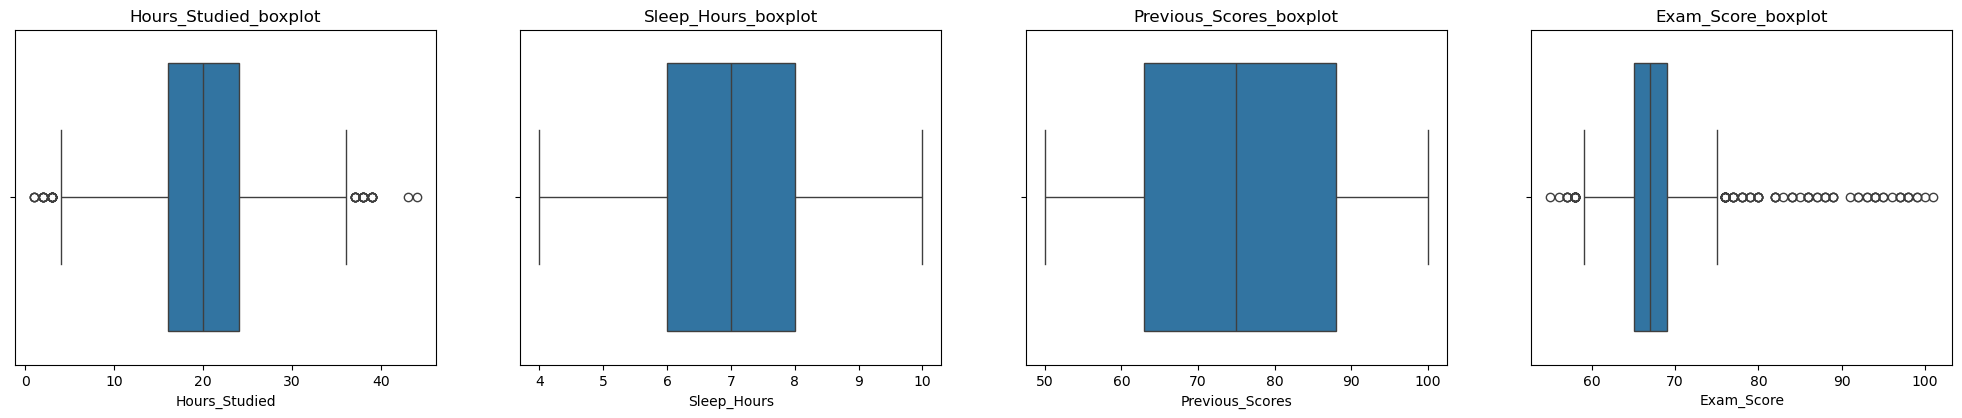

In [23]:
# boxplot for continous
j=1
plt.figure(figsize=(25,20))
for i in range(len(continous)):
    plt.subplot(4,4,j)
    sns.boxplot(data=df, x=continous[i])
    plt.title(f'{continous[i]}_boxplot')
    j=j+1
plt.show()

**Observation**:
- Outliers are displayed as individual points that fall outside the whiskers. These are values that are significantly different from the rest of the data.
- in study_hours and exam score outliers found

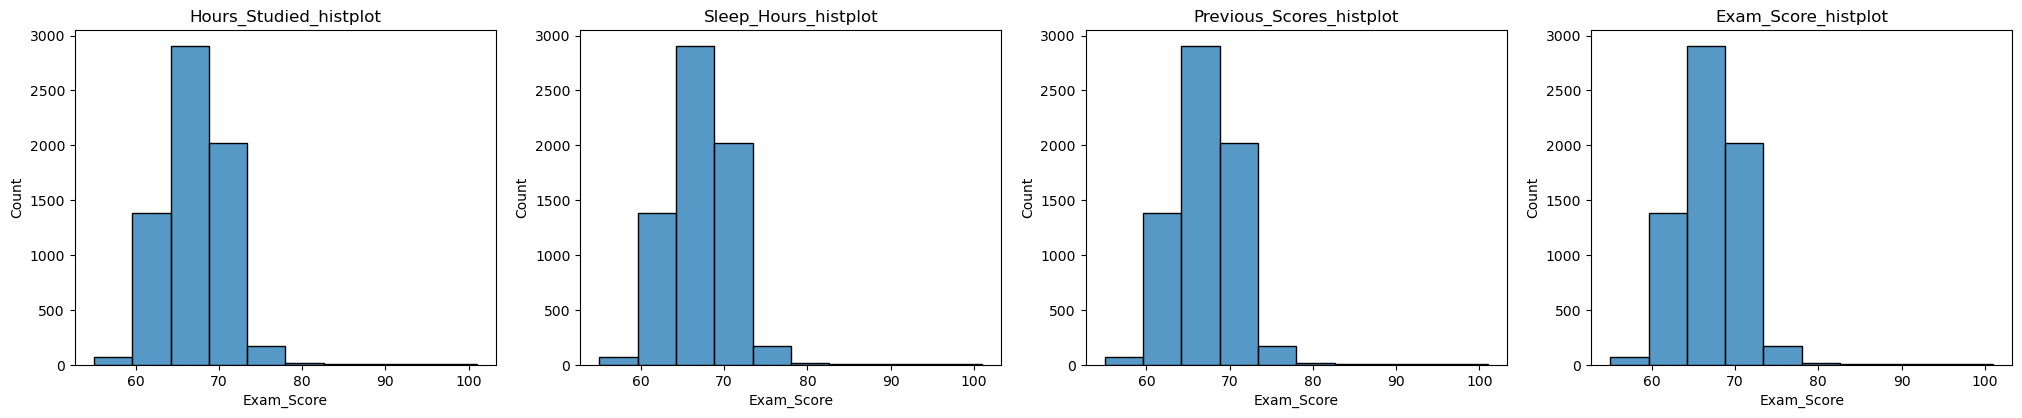

In [24]:
# boxplot for continous
j=1
plt.figure(figsize=(25,20))
for i in range(len(continous)):
    plt.subplot(4,4,j)
    sns.histplot(data=df, x=col, bins = 10)  
    plt.title(f'{continous[i]}_histplot')
    j=j+1
plt.show()

In [41]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

**Observation**
Histplot shows distribution of data each column how spred

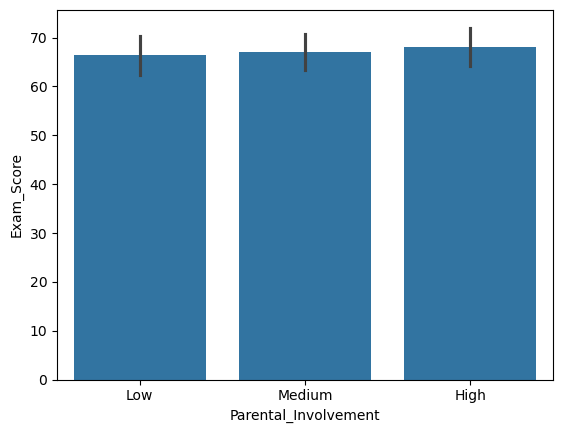

In [43]:
sns.barplot(x= 'Parental_Involvement', y= 'Exam_Score', ci="sd", data = df)  # ci="sd" adds standard deviation error bars
plt.show()

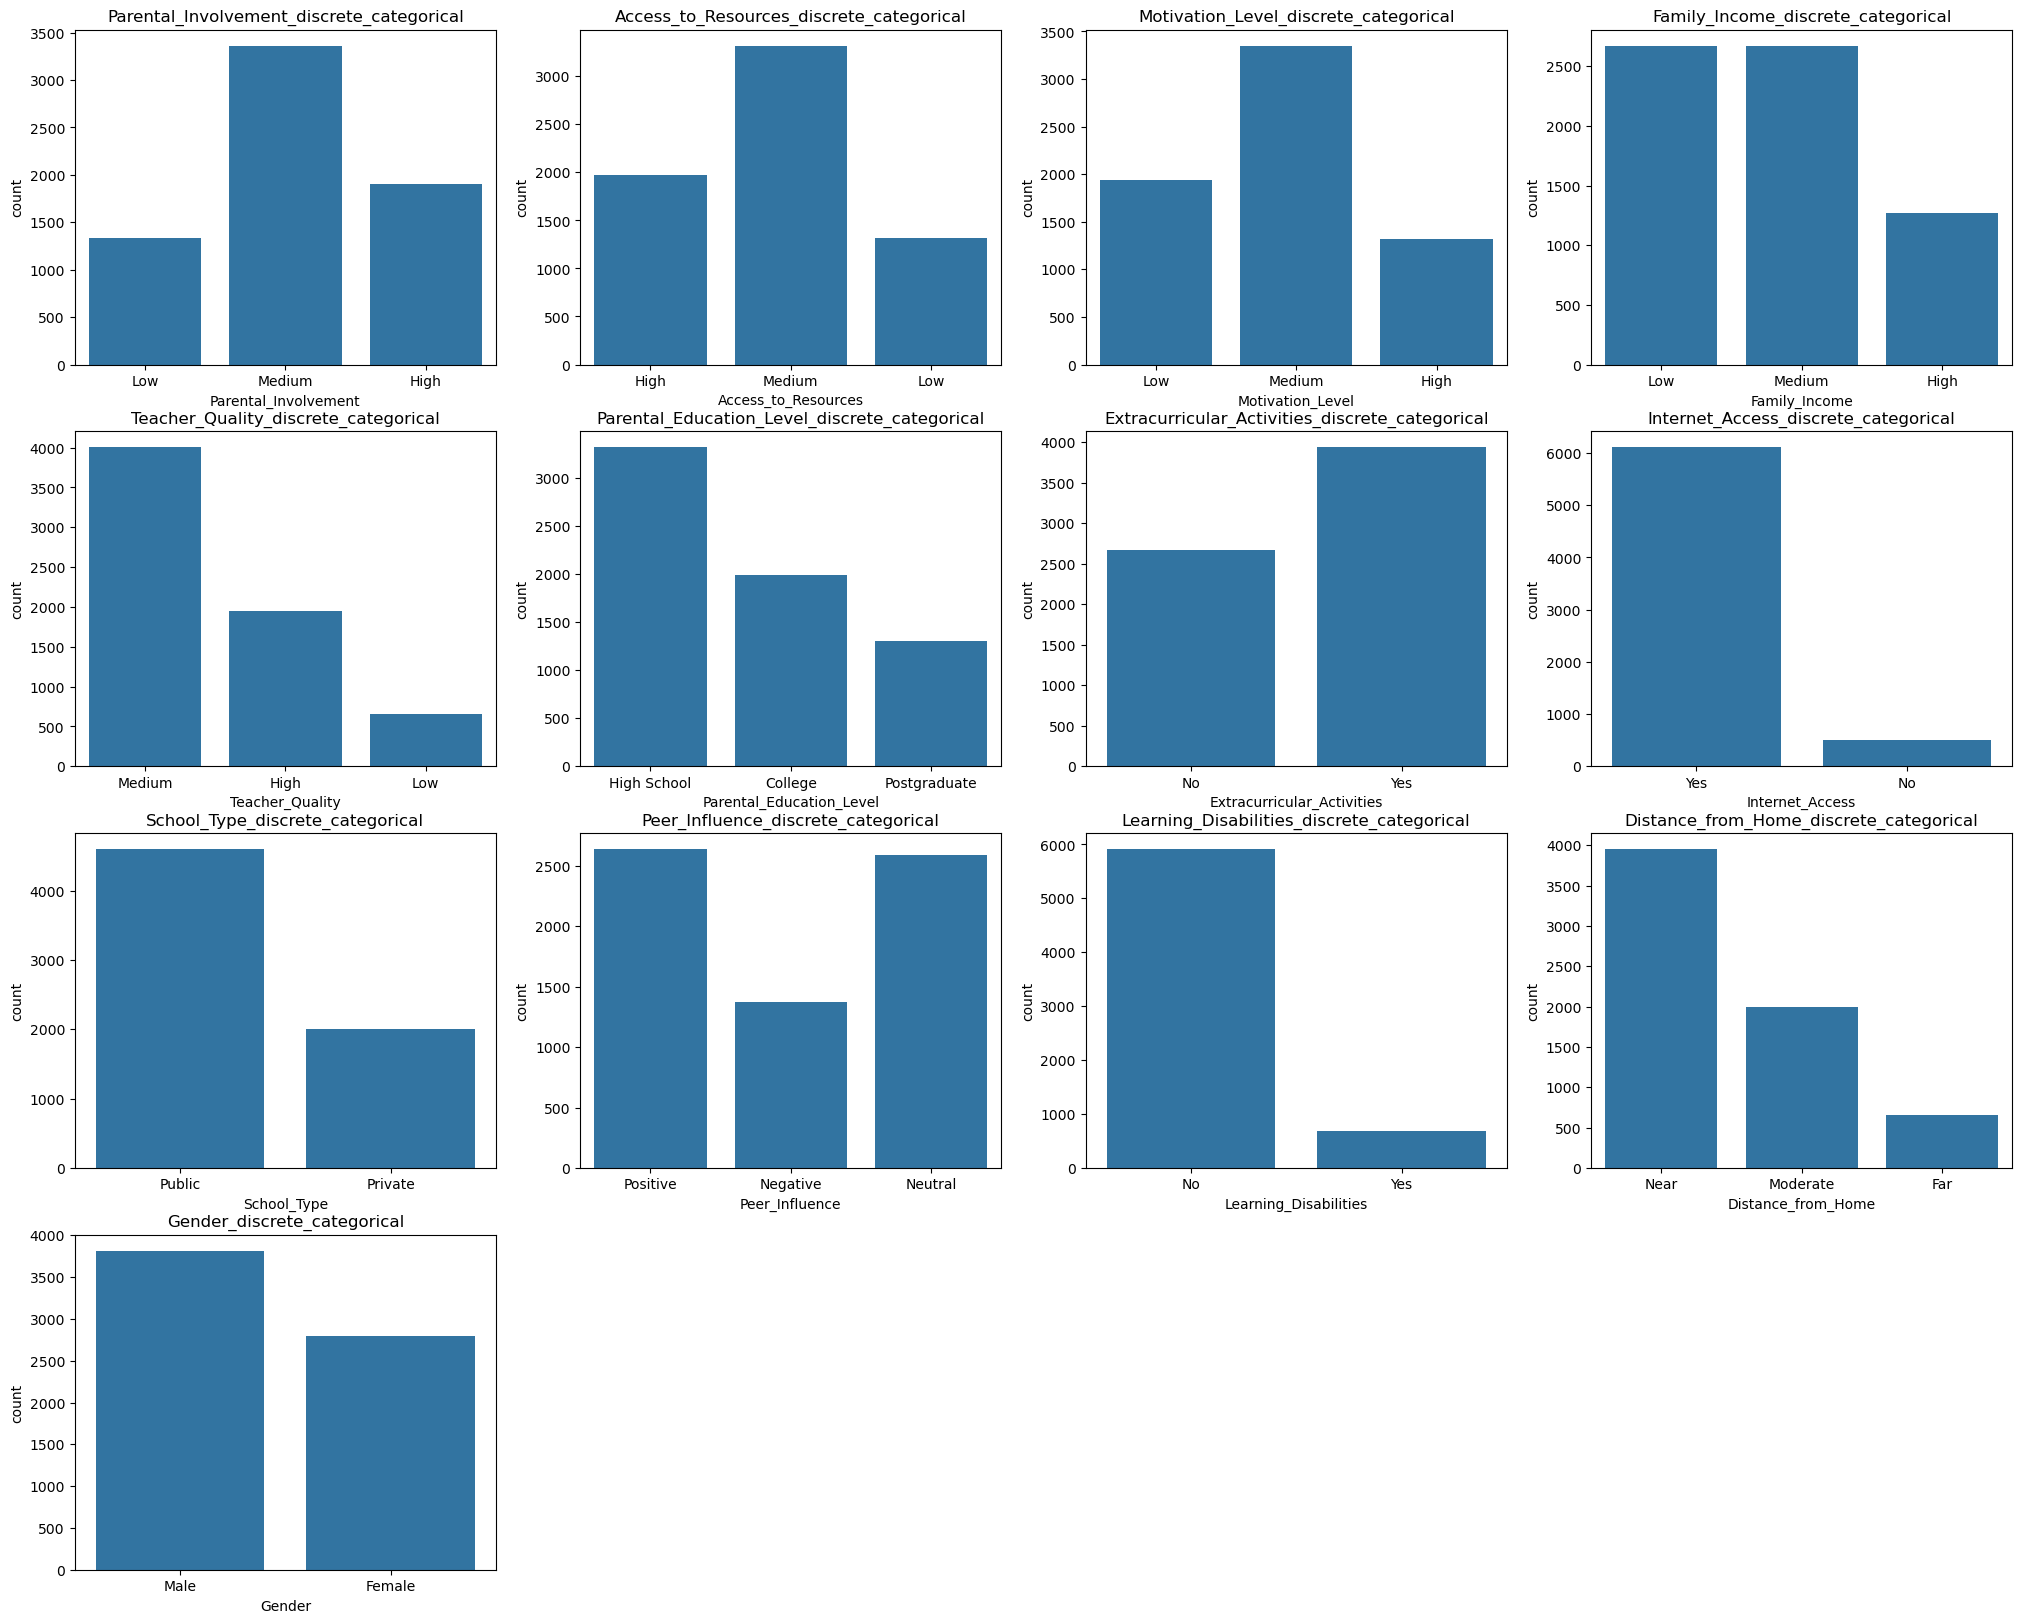

In [25]:
# countplot for discrete
j=1
plt.figure(figsize=(25,20))
for i in range(len(discrete_categorical)):
    plt.subplot(4,4,j)
    sns.countplot(data=df, x=discrete_categorical[i])
    plt.title(f'{discrete_categorical[i]}_discrete_categorical')
    j=j+1
plt.show()

# Questions for analysis

-Distribution of Exam Scores

**Q. What is the distribution of Exam Scores across students? Is the score distribution skewed or normally distributed?**

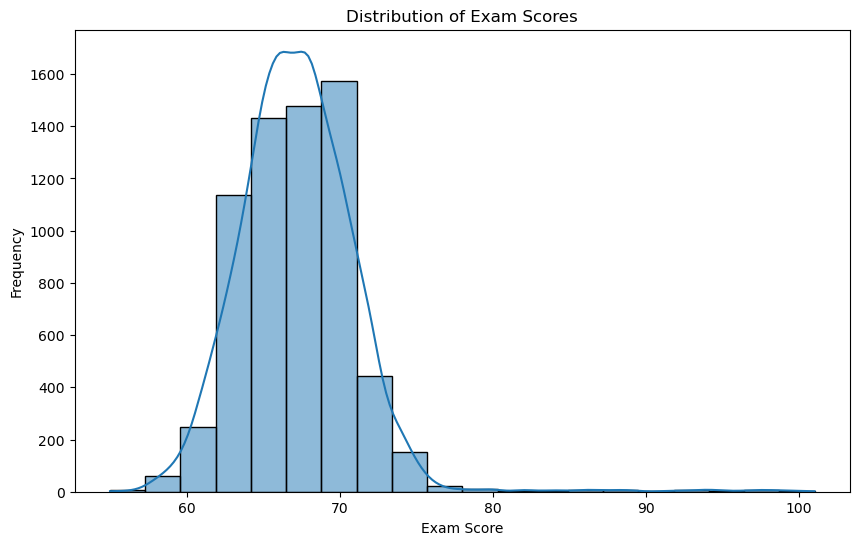

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], kde=True, bins=20)  # Adjust bins as necessary
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

In [27]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


**Q Calculate the correlation between continuous variables and Exam_Score to understand linear relationships**

In [28]:

corr = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
             'Exam_Score']].corr()

print("Correlation with Exam_Score:")
print(corr['Exam_Score'].sort_values(ascending=False))


Correlation with Exam_Score:
Exam_Score         1.000000
Attendance         0.581072
Hours_Studied      0.445455
Previous_Scores    0.175079
Sleep_Hours       -0.017022
Name: Exam_Score, dtype: float64


**Observation**:
- Attendance (0.581):

Shows a strong positive correlation with Exam_Score.
This indicates that higher attendance is significantly associated with better exam performance.
- Hours_Studied (0.445):

Moderately positively correlated with Exam_Score.
Suggests that more hours of study contribute to improved exam scores.
Previous_Scores (0.175):

Weak positive correlation with Exam_Score.
Indicates that prior academic performance has a limited impact on current exam performance.
- Sleep_Hours (-0.017):

Negligible negative correlation with Exam_Score.
Suggests no meaningful relationship between sleep hours and exam scores.

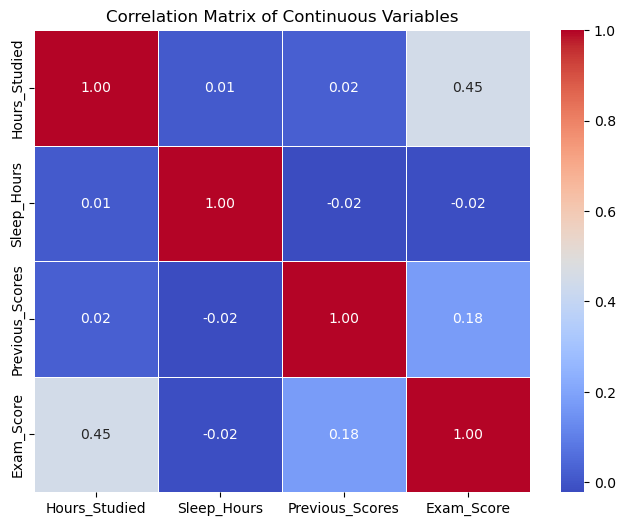

In [29]:
correlation_matrix = df[continous].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()


**Observation**:
- Strong Positive Correlation:

- Exam_Score and Attendance (0.58): Indicates that students with higher attendance tend to perform better in exams.
Exam_Score and Hours_Studied (0.45): Shows that increased study hours are associated with improved exam performance.
Moderate Positive Correlation:

- Attendance and Hours_Studied: Suggests students who attend more classes are also likely to dedicate more time to studying.
Weak Positive Correlation:

- Exam_Score and Previous_Scores (0.17): Prior academic performance has a limited impact on current scores.
Negligible or Weak Negative Correlation:

- Exam_Score and Sleep_Hours (-0.02): Implies sleep hours have no meaningful impact on exam performance.
- Sleep_Hours and other variables: Minimal influence of sleep patterns on study habits or exam results.
-  Attendance is the most significant predictor of Exam_Score among the continuous variables.
Hours studied play a secondary but still meaningful role in enhancing performance.
Sleep hours and previous scores show limited or negligible correlations with exam performance.

**Q. Group by categorical variables and calculate the mean exam score for each group.**

In [30]:
for feature in discrete_categorical:
    mean_scores = df.groupby(feature)['Exam_Score'].mean()
    print(f"Mean Exam Score by {feature}:\n{mean_scores}\n")

Mean Exam Score by Parental_Involvement:
Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64

Mean Exam Score by Access_to_Resources:
Access_to_Resources
High      68.092152
Low       66.203351
Medium    67.134378
Name: Exam_Score, dtype: float64

Mean Exam Score by Motivation_Level:
Motivation_Level
High      67.704321
Low       66.752194
Medium    67.330648
Name: Exam_Score, dtype: float64

Mean Exam Score by Family_Income:
Family_Income
High      67.842396
Low       66.848428
Medium    67.334959
Name: Exam_Score, dtype: float64

Mean Exam Score by Teacher_Quality:
Teacher_Quality
High      67.676939
Low       66.753425
Medium    67.100175
Name: Exam_Score, dtype: float64

Mean Exam Score by Parental_Education_Level:
Parental_Education_Level
College         67.315737
High School     66.897978
Postgraduate    67.970881
Name: Exam_Score, dtype: float64

Mean Exam Score by Extracurricular_Activities:
Extracurricular_Activitie

In [31]:
#using plots we can better understood

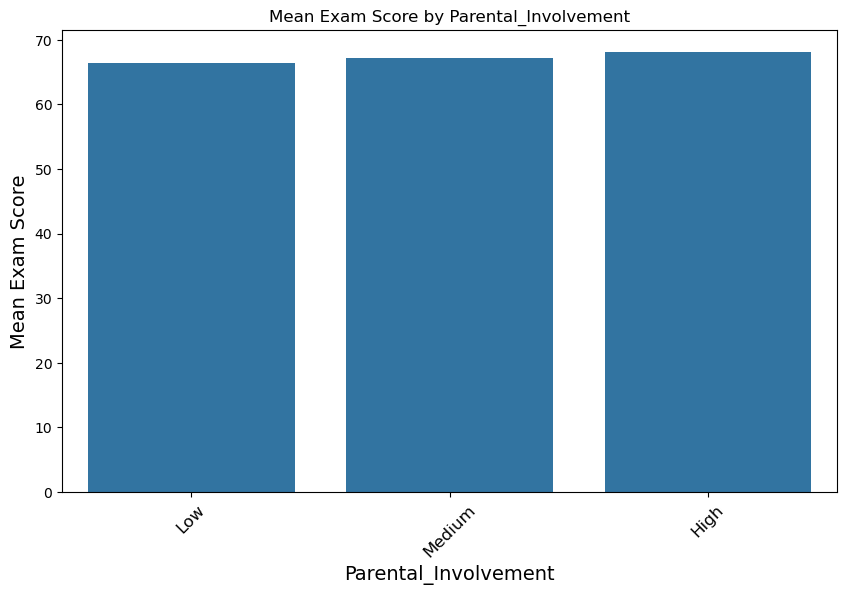

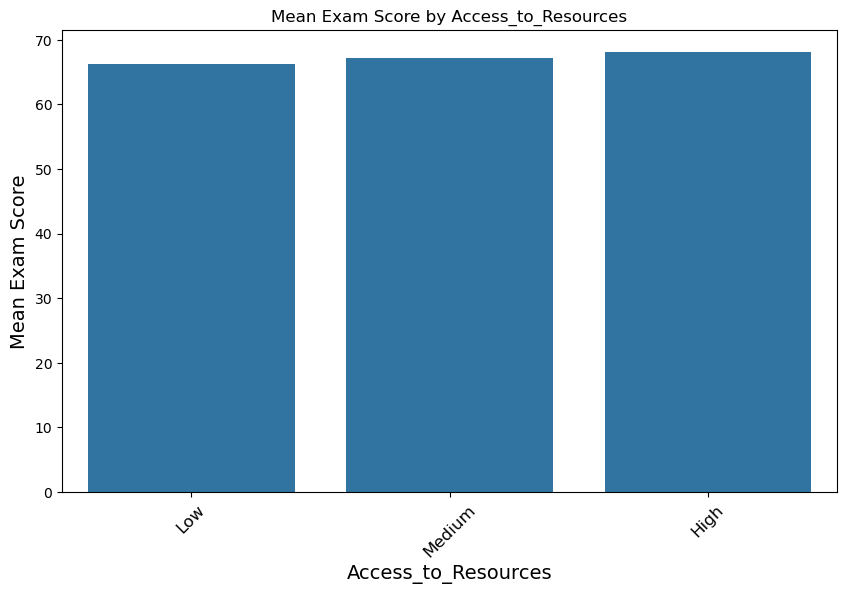

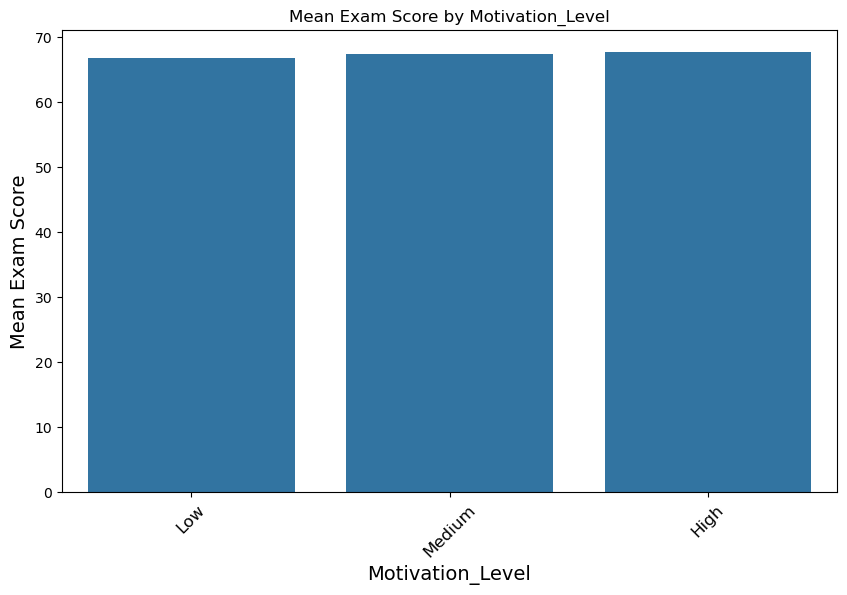

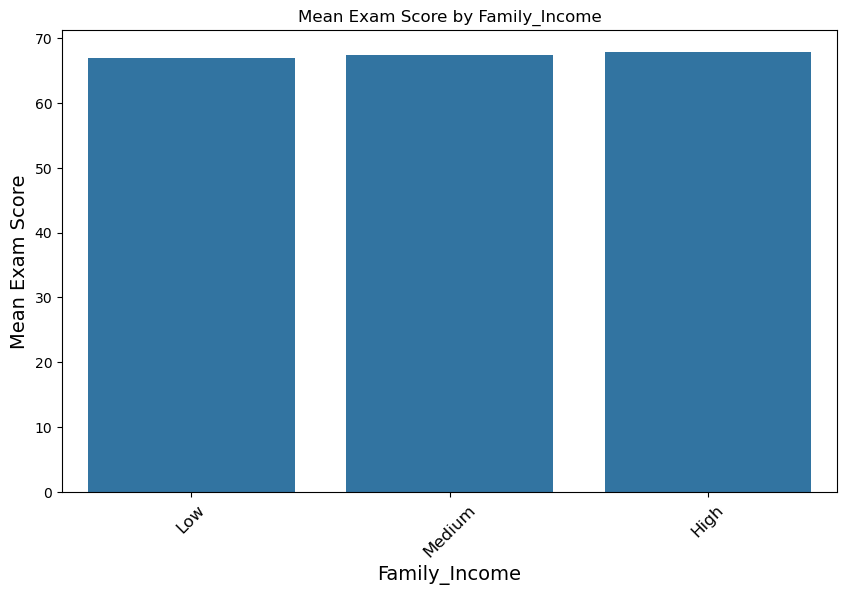

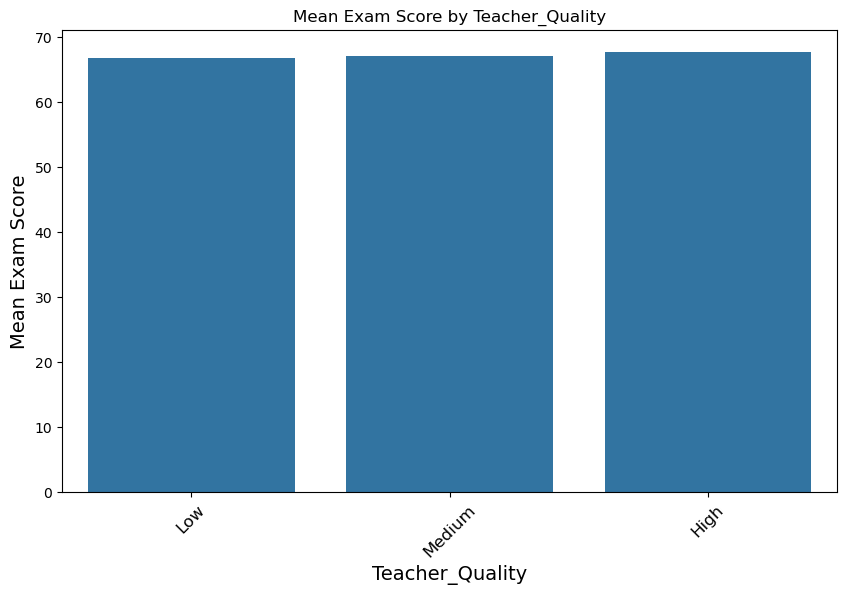

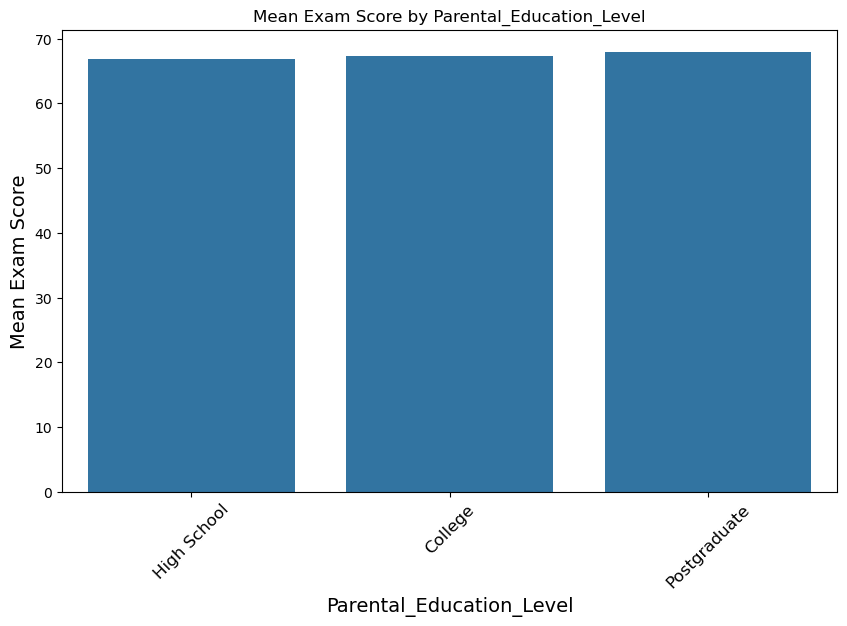

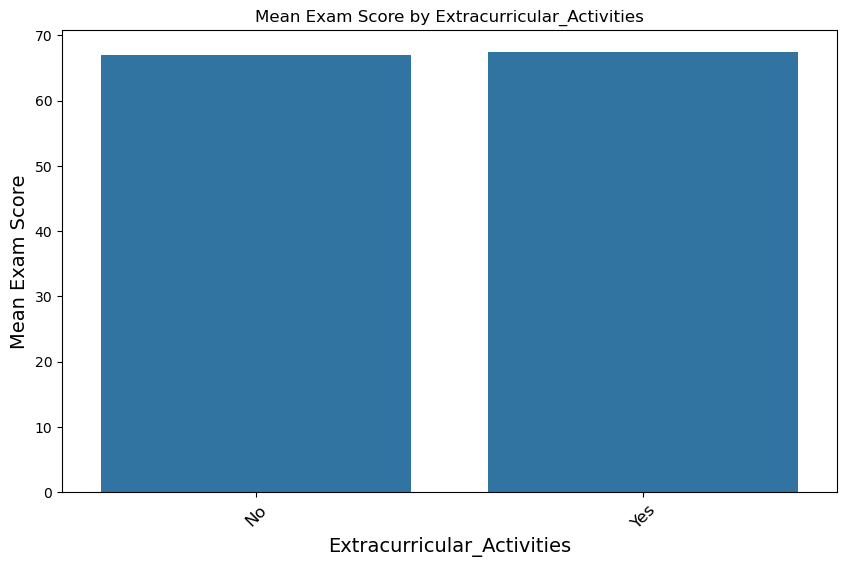

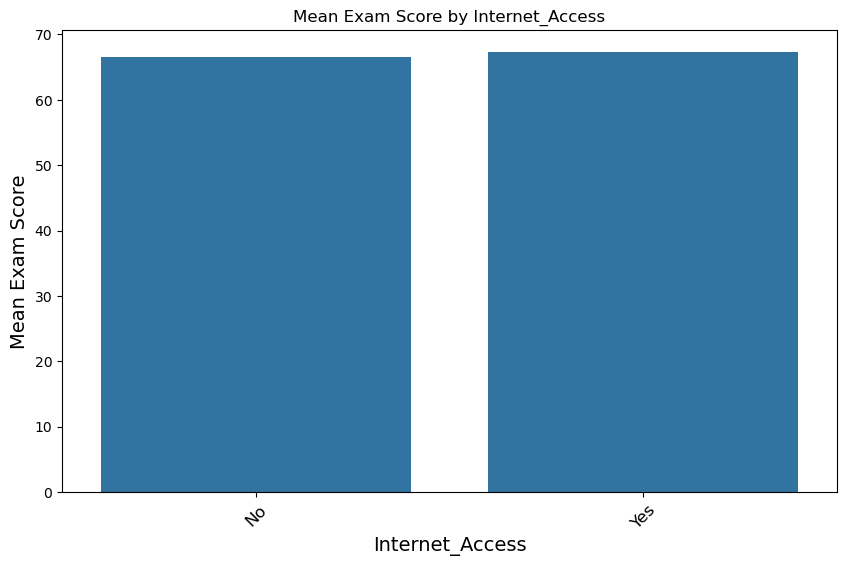

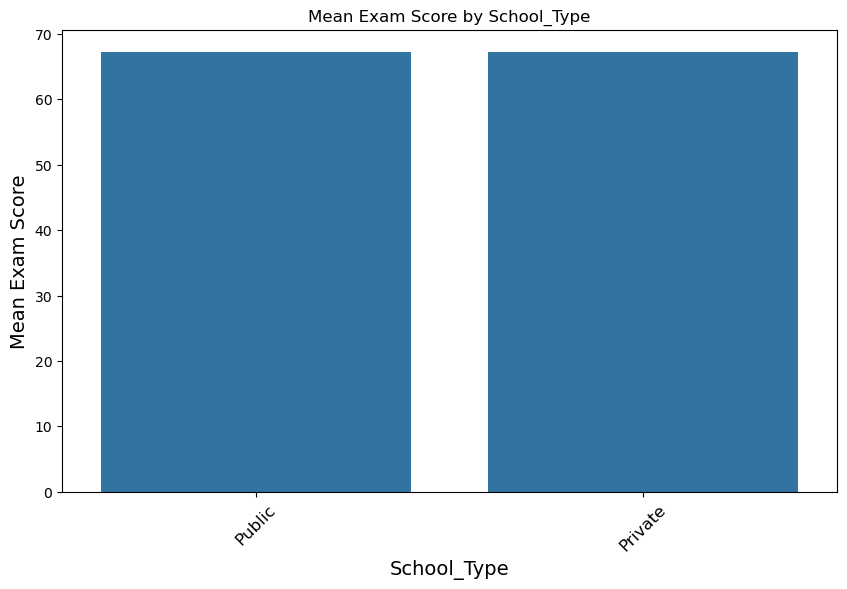

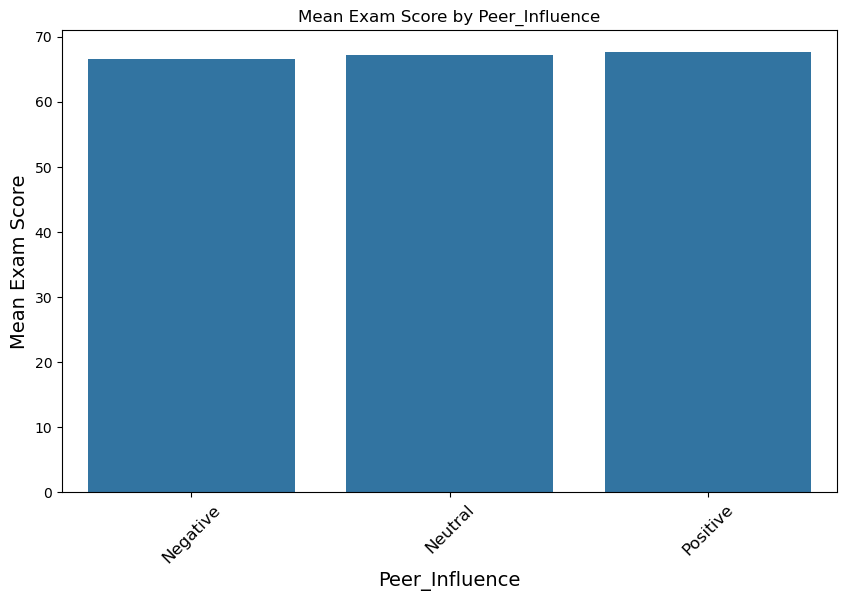

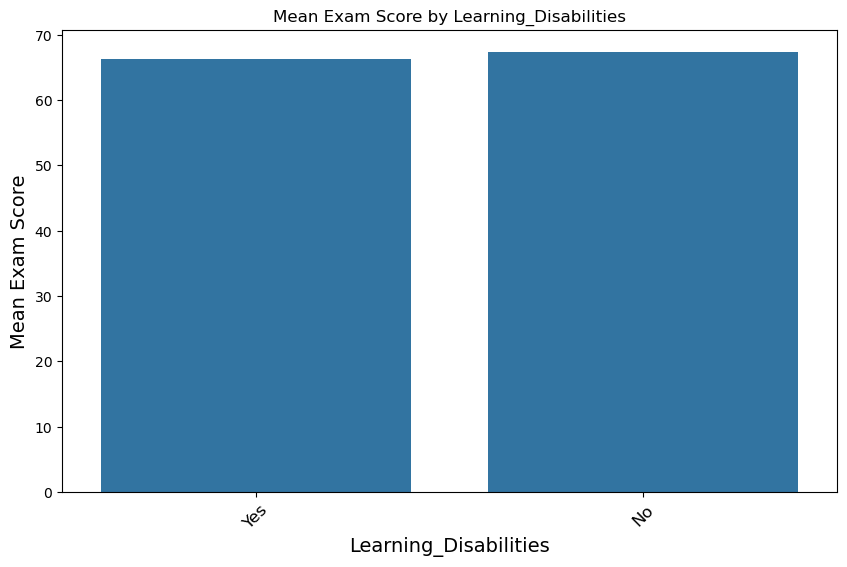

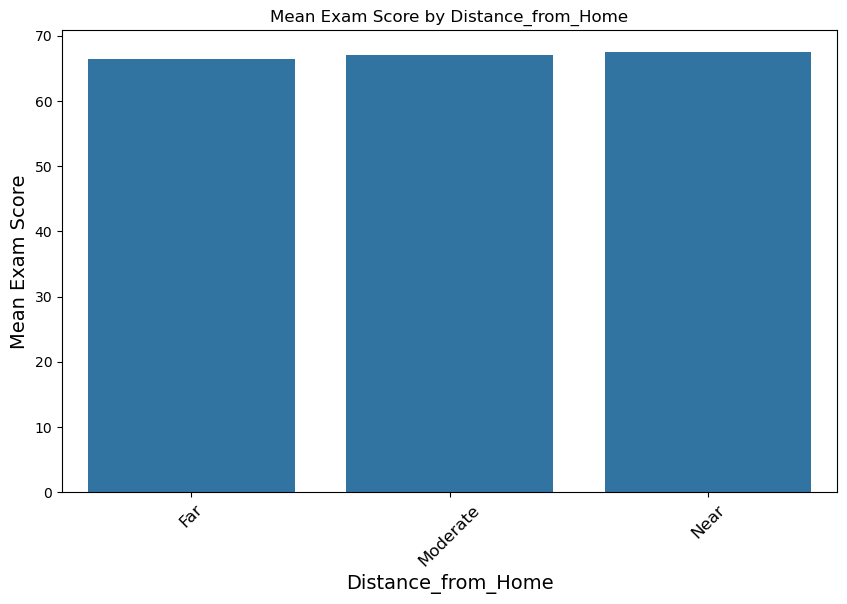

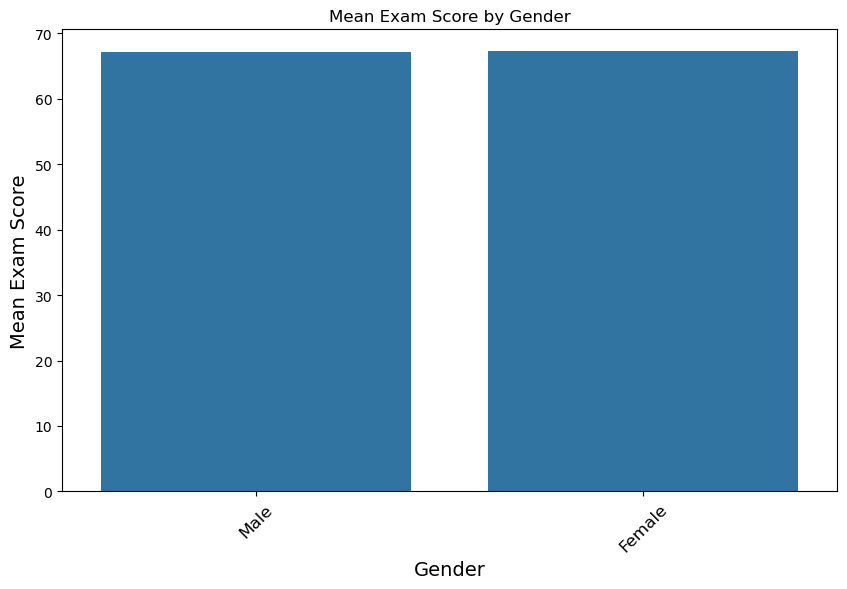

In [32]:
for feature in discrete_categorical:
    mean_scores = df.groupby(feature)['Exam_Score'].mean().sort_values()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mean_scores.index, y=mean_scores.values)
    plt.title(f'Mean Exam Score by {feature}')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Mean Exam Score', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

**Observation**: 
- Parental Involvement:

Students with higher parental involvement tend to have higher mean exam scores.
Suggests a significant impact of parental guidance on student performance.
- Access to Resources:

Higher access to resources correlates with better mean exam scores.
Indicates the importance of educational tools and materials.
- Extracurricular Activities:

Participation in extracurricular activities often shows a moderate impact on exam scores, reflecting a balance between academics and co-curricular engagement.
- Motivation Level:
 Students with higher motivation levels exhibit noticeably higher exam scores.
Suggests self-drive and determination as critical factors in academic success.
- Internet Access:

Access to the internet shows a positive association with mean exam scores.
Highlights the role of technology and information accessibility in learning.
- Teacher Quality:

 Better-rated teacher quality corresponds to higher mean exam scores.
Reflects the influence of effective teaching on student outcomes.
- School Type:

Private schools might show slightly higher mean scores compared to public schools, though variability could depend on other factors like resources and teaching methods.
- Peer Influence:

Positive peer influence aligns with improved mean exam scores.
Indicates the role of supportive social environments in academic performance.
- Physical Activity:

 Regular physical activity may contribute to marginally higher scores, possibly due to its impact on mental and physical well-being.
- Learning Disabilities:

Students without learning disabilities tend to score higher on average.
Suggests the need for tailored interventions for students with learning challenges.
- Parental Education Level:
Higher levels of parental education correlate with higher mean exam scores.
Reflects the role of parental academic background in supporting children's education.
- Gender:

 Gender may show some variation in mean scores, reflecting trends in learning preferences and societal influences.

In [33]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


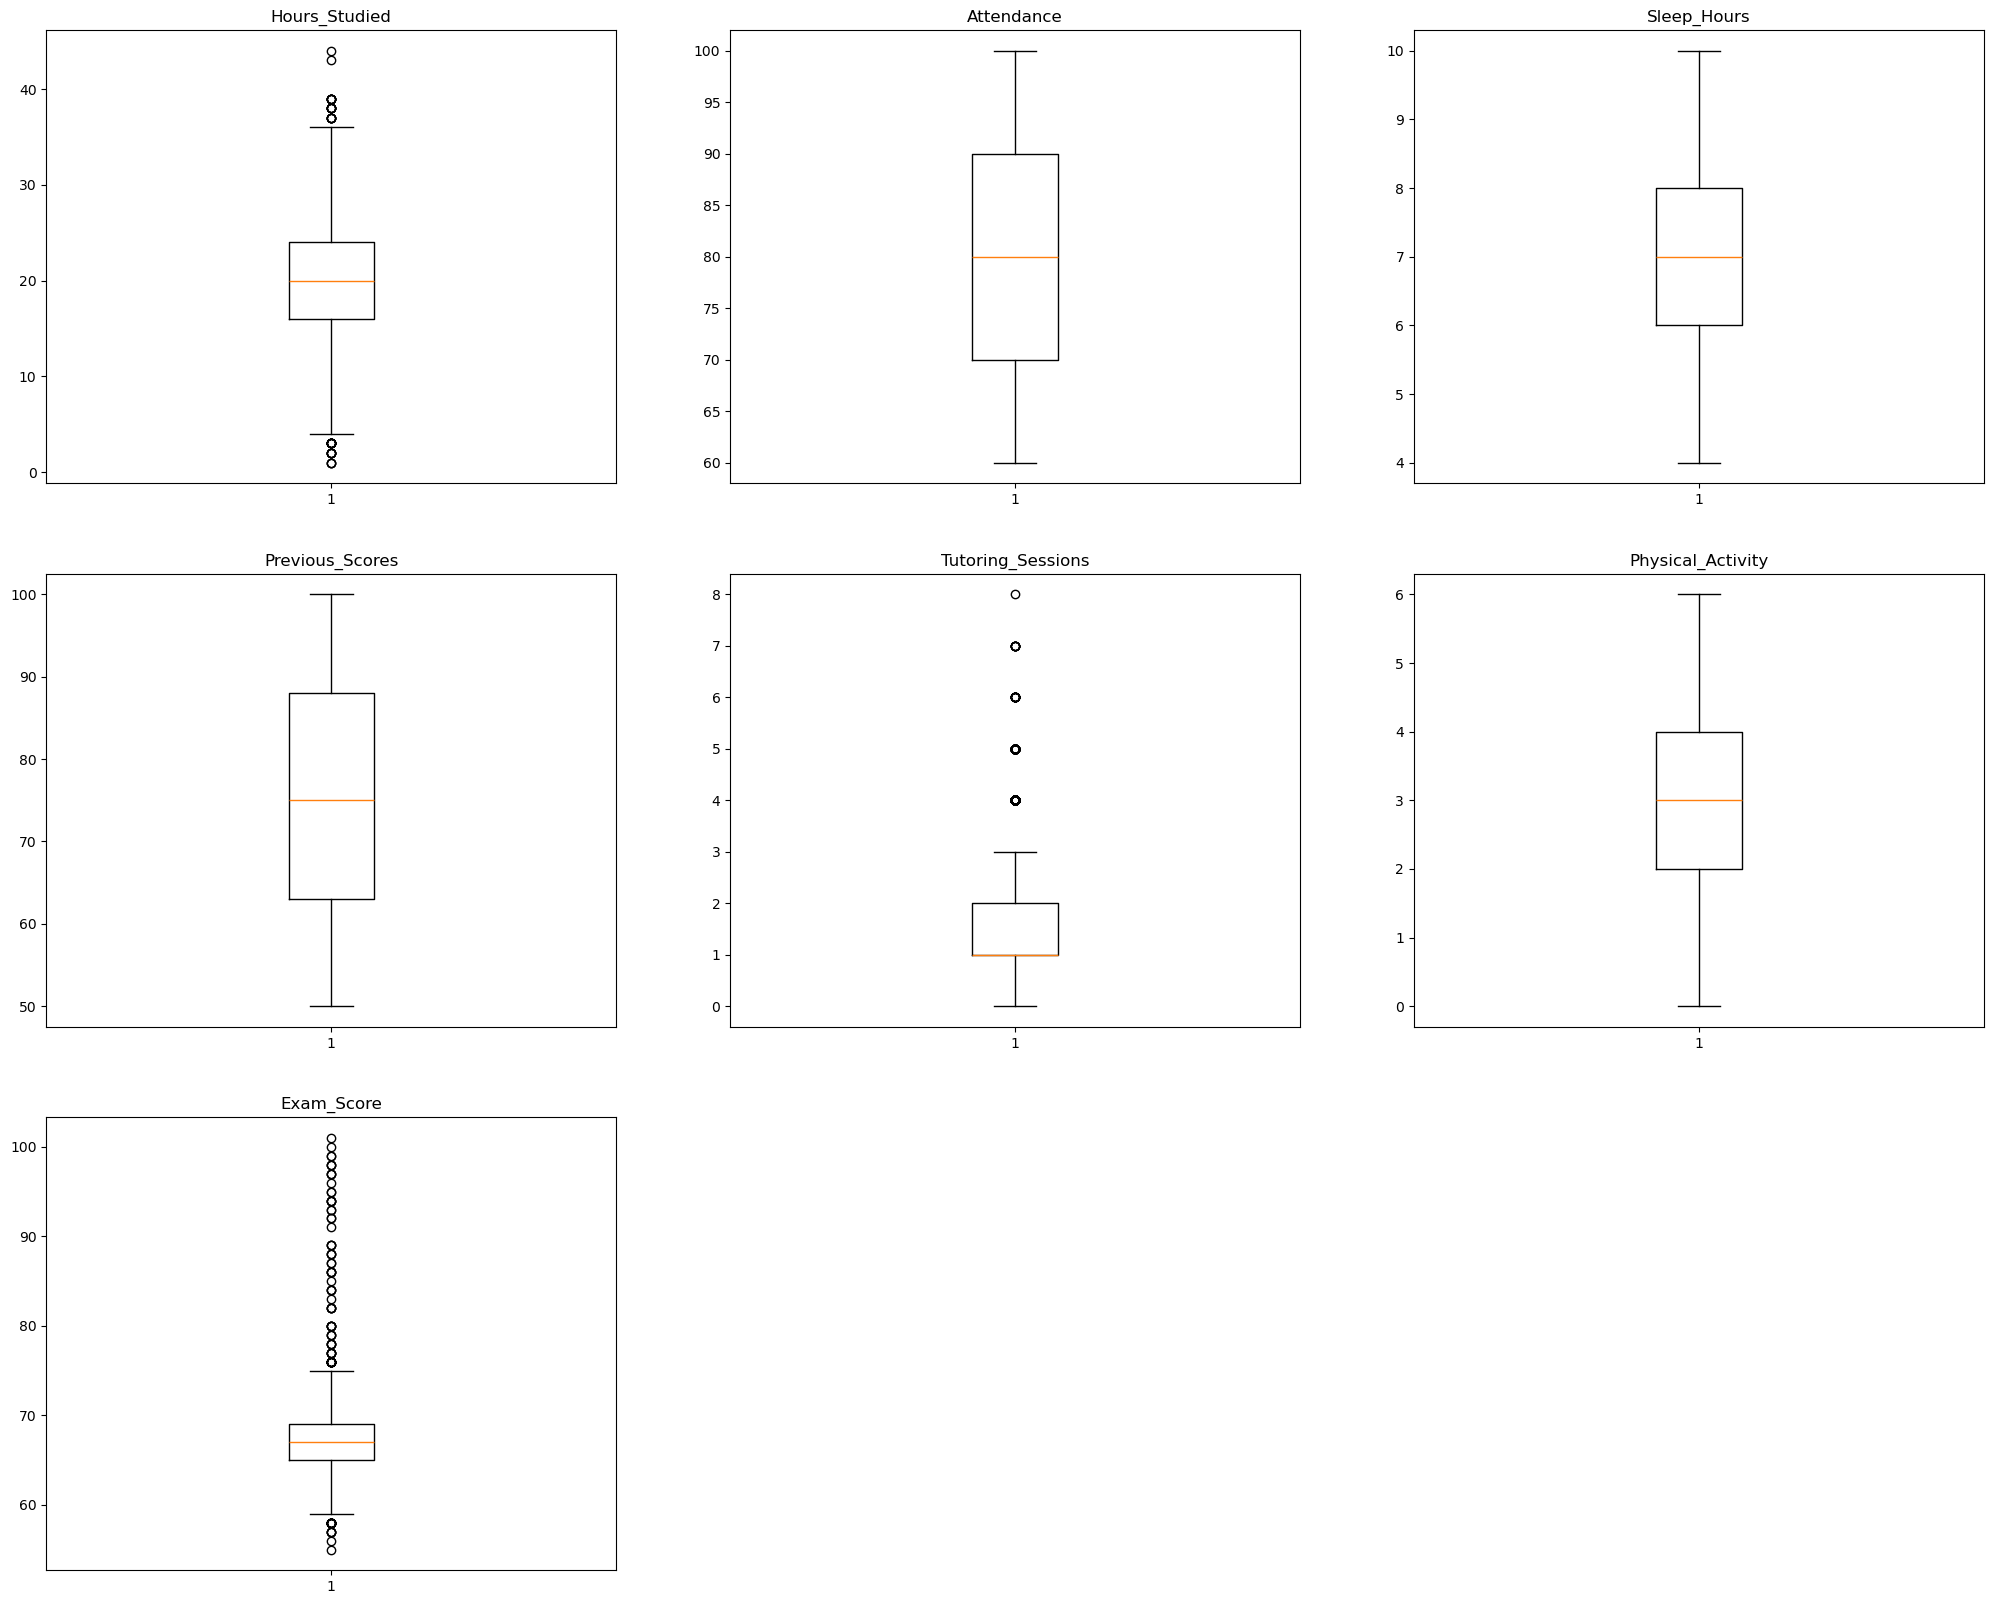

In [34]:
j=1
plt.figure(figsize=(25,20))
for i in num_cols:
    plt.subplot(3,3,j)
    plt.boxplot(df[i])
    plt.title(f'{i}')
    j=j+1
plt.show()

**observation**:
- checking Outlires with summary of 5 numbers

In [35]:
# using crosstab 

In [36]:
for i in range(len(cat_cols) - 1):
    col1 = df[cat_cols[i]]
    col2 = df[cat_cols[i + 1]]
    info = pd.crosstab(col1, col2)
    print(f'Crosstab of {cat_cols[i]} and {cat_cols[i + 1]}:\n')
    print(info)
    print('\n' )


Crosstab of Parental_Involvement and Access_to_Resources:

Access_to_Resources   High  Low  Medium
Parental_Involvement                   
High                   568  413     927
Low                    414  231     692
Medium                 993  669    1700


Crosstab of Access_to_Resources and Extracurricular_Activities:

Extracurricular_Activities    No   Yes
Access_to_Resources                   
High                         795  1180
Low                          509   804
Medium                      1365  1954


Crosstab of Extracurricular_Activities and Motivation_Level:

Motivation_Level            High   Low  Medium
Extracurricular_Activities                    
No                           515   801    1353
Yes                          804  1136    1998


Crosstab of Motivation_Level and Internet_Access:

Internet_Access    No   Yes
Motivation_Level           
High               92  1227
Low               162  1775
Medium            245  3106


Crosstab of Internet_Access and 

**Observation**:
- This output shows how the variables Parental_Involvement and Extracurricular_Activities, or Access_to_Resources and Motivation_Level are related by counting the occurrences of each category combination

In [37]:
corr_data=df.corr(numeric_only=True)
corr_data

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


In [38]:
# using plot we can see observation

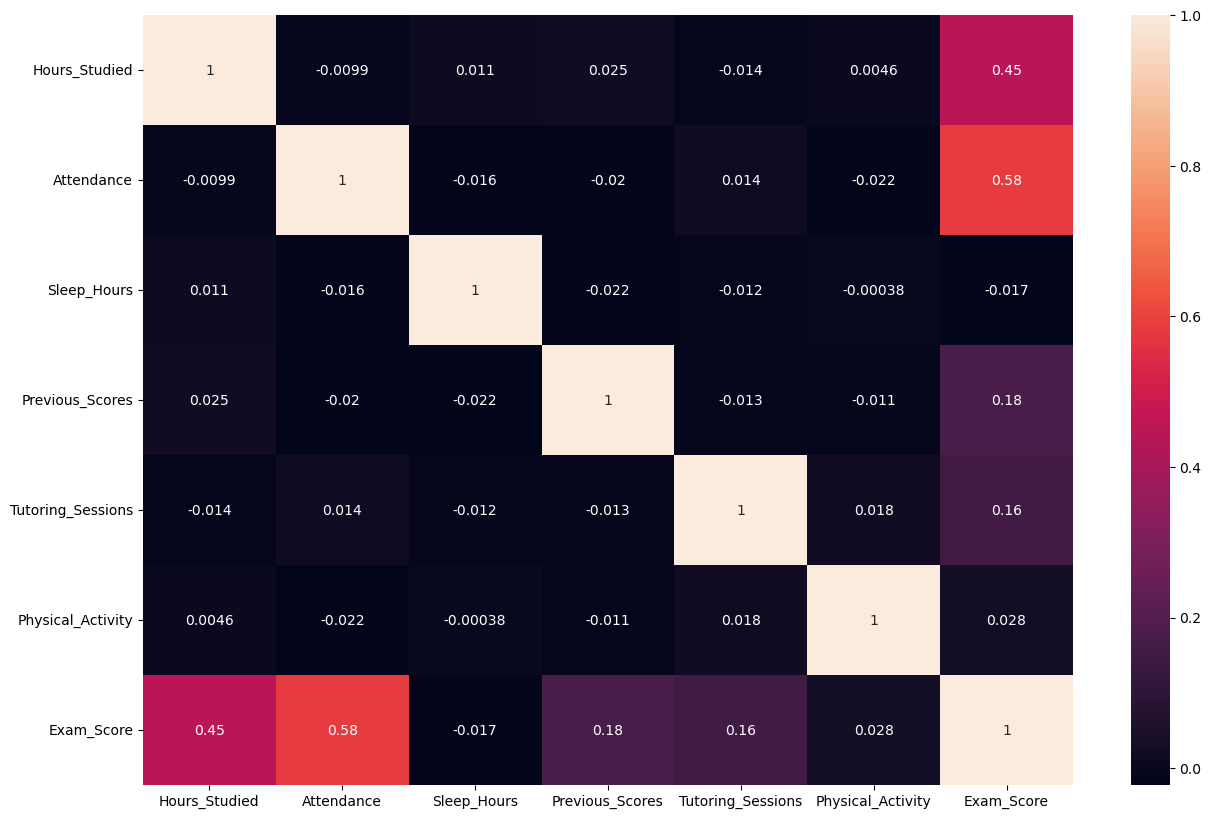

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_data,annot=True)
plt.show()

**Observation**:
- The correlation matrix reveals that Attendance (0.581) and Hours_Studied (0.445) have a moderate positive correlation with Exam_Score, suggesting that higher attendance and more study hours are associated with better exam performance, while other factors like Sleep_Hours and Physical_Activity show very weak correlations.